<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173_Fall2025/blob/main/F25_Class_03_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 3: Convolutional Neural Networks (CNN's)**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 3 Material

* Part 3.1: Using Convolutional Neural Networks
* Part 3.2: Using Pre-Trained Neural Networks with Keras
* Part 3.3: Facial Recognition and Analysis
* **Part 3.4: Introduction to GAN's for Image and Data Generation**

### Change your Runtime Now

For this lesson you should pick the A100 GPU hardware accelerator.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [1]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


Make sure your GMAIL address is included as the last line in the output above.

## Accelerated Run-time Check

You MUST run the following code cell to get credit for this class lesson. The code in this cell checks what hardware acceleration you are using. To run this lesson, you must be running either a Graphics Processing Unit (GPU) or a Tensor Processing Unit (TPU).

In [2]:
# You must run this cell second

import tensorflow as tf

def check_device():
    # Check for available devices
    devices = tf.config.list_physical_devices()

    # Initialize device flags
    cpu = False
    gpu = False
    tpu = False

    # Check device types
    for device in devices:
        if device.device_type == 'CPU':
            cpu = True
        elif device.device_type == 'GPU':
            gpu = True
        elif device.device_type == 'TPU':
            tpu = True

    # Output device status
    if tpu:
        print("Running on TPU")
    elif gpu:
        print("Running on GPU")
    elif cpu:
        print("Running on CPU")
        print("WARNING: You must run this assigment using either a GPU or a TPU to earn credit")
        print("Change your RUNTIME now!")
    else:
        print("No compatible device found")
        print("WARNING: You must run this assigment using either a GPU or a TPU to earn credit")
        print("Change your RUNTIME now!")

# Call the function
check_device()

Running on GPU


Your output should say `Running on GPU` or `Running on TPU`. If, instead, you received a warning, you need to change your Runtime and start over.

# **Introduction to GANS for Image and Data Generation**

A generative adversarial network (GAN) is a class of machine learning systems invented by Ian Goodfellow in 2014. [[Cite:goodfellow2014generative]](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf) Two neural networks compete with each other in a game. The GAN training algorithm starts with a training set and learns to generate new data with the same distributions as the training set. For example, a GAN trained on photographs can generate new photographs that look at least superficially authentic to human observers, having many realistic characteristics.

Running this notebook in this notebook in Google CoLab is the most straightforward means of completing this chapter. Because of this, I designed this notebook to run in Google CoLab. It will take some modifications if you wish to run it locally.

This original StyleGAN paper used neural networks to automatically generate images for several previously seen datasets: MINST and CIFAR. However, it also included the Toronto Face Dataset (a private dataset used by some researchers). You can see some of these images in Figure 7.GANS.

**Figure 7.GANS: GAN Generated Images**
![GAN](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan-2.png "GAN Generated Images")

Only sub-figure D made use of convolutional neural networks. Figures A-C make use of fully connected neural networks. As we will see in this module, the researchers significantly increased the role of convolutional neural networks for GANs.

We call a GAN a generative model because it generates new data. You can see the overall process in Figure 7.GAN-FLOW.

**Figure 7.GAN-FLOW: GAN Structure**
![GAN Structure](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan-1.png "GAN Structure")

## Face Generation with StyleGAN and Python

GANs have appeared frequently in the media, showcasing their ability to generate highly photorealistic faces. One significant step forward for realistic face generation was the NVIDIA StyleGAN series. NVIDIA introduced the origional StyleGAN in 2018. [[Cite:karras2019style]](https://arxiv.org/abs/1812.04948) StyleGAN was followed by StyleGAN2 in 2019, which improved the quality of StyleGAN by removing certian artifacts. [[Cite:karras2019analyzing]](https://arxiv.org/abs/1912.04958) Most recently, in 2020, NVIDIA released StyleGAN2 adaptive discriminator augmentation (ADA), which will be the focus of this module. [[Cite:karras2020training]](https://arxiv.org/abs/2006.06676)  We will see both how to train StyleGAN2 ADA on any arbitray set of images; as well as use pretrained weights provided by NVIDIA. The NVIDIA weights allow us to generate high resolution photorealistic looking faces, such seen in Figure 7.STY-GAN.

**Figure 7.STY-GAN: StyleGAN2 Generated Faces**
![StyleGAN2 Generated Faces](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2_images.jpg "StyleGAN2 Generated Faces")

The above images were generated with StyleGAN2, using Google CoLab. Following the instructions in this section, you will be able to create faces like this of your own. StyleGAN2 images are usually 1,024 x 1,024 in resolution.  An example of a full-resolution StyleGAN image can be [found here](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2-hires.jpg).

The primary advancement introduced by the adaptive discriminator augmentation is that the algorithm augments the training images in real-time. Image augmentation is a common technique in many convolution neural network applications. Augmentation has the effect of increasing the size of the training set. Where StyleGAN2 previously required over 30K images for an effective to develop an effective neural network; now much fewer are needed. I used 2K images to train the fish generating GAN for this section. Figure 7.STY-GAN-ADA demonstrates the ADA process.

**Figure 7.STY-GAN-ADA: StyleGAN2 ADA Training**
![StyleGAN2 Generated Faces](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2-ada-teaser-1024x252.jpg "StyleGAN2 Generated Faces")

The figure shows the increasing probability of augmentation as $p$ increases. For small image sets, the discriminator will generally memorize the image set unless the training algorithm makes use of augmentation. Once this memorization occurs, the discriminator is no longer providing useful information to the training of the generator.

While the above images look much more realistic than images generated earlier in this course, they are not perfect. Look at Figure 7.STYLEGAN2. There are usually several tell-tail signs that you are looking at a computer-generated image. One of the most obvious is usually the surreal, dream-like backgrounds. The background does not look obviously fake at first glance; however, upon closer inspection, you usually can't quite discern what a GAN-generated background is. Also, look at the image character's left eye. It is slightly unrealistic looking, especially near the eyelashes.

Look at the following GAN face. Can you spot any imperfections?

**Figure 7.STYLEGAN2: StyleGAN2 Face**
![StyleGAN2 Face](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan_bad.jpg "StyleGAN2 Face")

* Image A demonstrates the abstract backgrounds usually associated with a GAN-generated image.
* Image B exhibits issues that earrings often present for GANs. GANs sometimes have problems with symmetry, particularly earrings.
* Image C contains an abstract background and a highly distorted secondary image.
* Image D also contains a highly distorted secondary image that might be a hand.

Several websites allow you to generate GANs of your own without any software.

* [This Person Does not Exist](https://www.thispersondoesnotexist.com/)
* [Which Face is Real](http://www.whichfaceisreal.com/)

The first site generates high-resolution images of human faces. The second site presents a quiz to see if you can detect the difference between a real and fake human face image.

In this chapter, you will learn to create your own StyleGAN pictures using Python.

## **Generating High Rez GAN Faces with Google CoLab**

This lesson demonstrates how to run [NVidia StyleGAN2 ADA](https://github.com/NVlabs/stylegan2-ada) inside a Google CoLab notebook.  

You should use a pretrained model instead of trying to train your own model since you will run into compute limitations of Google CoLab. Also, you need to run this code on an accelerated run time environment using a `GPU`. Why a `GPU` and not a `TPU`? Well the `StyleGAN3` library was created by NVidia, the company that makes `GPUs`; `TPUs` are made by Google.

The first step is to clone NVidia's GitHub repository to your Colab directory and then install a Python package called `ninja`. `Ninja` is a "wrapper" for the **Ninja build system**. Ninja is primarily used to orchestrate the compilation of source code into executables or libraries. It focuses on speed and is ideal for large projects with complex dependencies.   

In [3]:
# Install stylegans3 and ninja

!git clone https://github.com/NVlabs/stylegan3.git
!pip install ninja

Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 212 (delta 99), reused 90 (delta 90), pack-reused 49 (from 1)
Receiving objects: 100% (212/212), 4.16 MiB | 20.49 MiB/s, done.
Resolving deltas: 100% (108/108), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 6.4 MB/s eta 0:00:00


If the code is correct, you should see the following output:

~~~text
Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 212 (delta 101), reused 96 (delta 96), pack-reused 46 (from 1)
Receiving objects: 100% (212/212), 4.16 MiB | 20.19 MiB/s, done.
Resolving deltas: 100% (107/107), done.
Collecting ninja
  Downloading ninja-1.11.1.3-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.3 kB)
Downloading ninja-1.11.1.3-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (422 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 7.9 MB/s eta 0:00:00
Installing collected packages: ninja
Successfully installed ninja-1.11.1.3

~~~

### Verify that `StyleGAN` has been cloned

Before continuing, it's a good idea to make sure that `StyleGAN3` has been sucessfully installed in your Colab library by running the next code cell.

In [4]:
# Verity Stylegan3 has been cloned

!ls /content/stylegan3

avg_spectra.py	 dnnlib      environment.yml  gui_utils    metrics	training       viz
calc_metrics.py  Dockerfile  gen_images.py    legacy.py    README.md	train.py
dataset_tool.py  docs	     gen_video.py     LICENSE.txt  torch_utils	visualizer.py


You should see something similar to the following:

~~~text
avg_spectra.py	 dnnlib      environment.yml  gui_utils    metrics	training       viz
calc_metrics.py  Dockerfile  gen_images.py    legacy.py    README.md	train.py
dataset_tool.py  docs	     gen_video.py     LICENSE.txt  torch_utils	visualizer.py
~~~

If you **DON'T** see something similar to the above output, it means you were not sucessful installing StyleGANs3. You will need to correct this problem before you can continue.

### Example 1 - Step 1: Run StyleGan From Command Line

Now that you have `StyleGAN3` install in your Google Colab, we can start using it to generate images.

The code in the cell below uses a command line prompt to generate an image using the `StyleGAN3` model.

**Seeding StyleGan**

When you use StyleGAN you will generally create a GAN from a seed number. This seed is an integer, such as 6600, that will generate a unique image. The seed generates a latent vector containing 512 floating-point values. The GAN code uses the seed to generate these 512 values. The seed value is easier to represent in code than a 512 value vector; however, while a small change to the latent vector results in a slight change to the image, even a small change to the integer seed value will produce a radically different image.

#####**Code Explanation:**

**Define the Pretrained Model URL:**

```text
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/"\
      "stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"
```

The URL variable contains the location of the pretrained StyleGAN3 model file, hosted by NVIDIA. This model is responsible for generating images based on the seeds you specify.

**Run the Python Script:**

```text
!python /content/stylegan3/gen_images.py \
    --network={URL} \
    --outdir=/content/results --seeds=6600-6625
~~~

**!python:** Executes the gen_images.py script in the command line interface of the Colab environment.

**--network={URL}:** Passes the URL of the pretrained model to the script, allowing it to use this specific model for image generation.

**--outdir=/content/results:** Specifies the output directory (/content/results) where the generated images will be saved.

**--seeds=6600-6625:** Specifies the range of random seeds to use for generating images. Each seed produces a unique image. For instance, this range generates 26 images: seed6600.png to seed6625.png.

In [5]:
# Example 1 - Step 1: Run StyleGan from command line

# Retrive pre-trained model from NVidia
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/"\
      "stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

# Execute the python program `gen_images.py`
!python /content/stylegan3/gen_images.py \
    --network={URL} \
  --outdir=/content/results --seeds=6600-6625

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
Generating image for seed 6600 (0/26) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 6601 (1/26) ...
Generating image for seed 6602 (2/26) ...
Generating image for seed 6603 (3/26) ...
Generating image for seed 6604 (4/26) ...
Gene

If the code is correct, you should see something similar to the following out. (Don't worry about the warnings)

~~~text
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
Downloading https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl ... done
Generating image for seed 6600 (0/26) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation.
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation.
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 6601 (1/26) ...
Generating image for seed 6602 (2/26) ...
Generating image for seed 6603 (3/26) ...
Generating image for seed 6604 (4/26) ...
Generating image for seed 6605 (5/26) ...
Generating image for seed 6606 (6/26) ...
Generating image for seed 6607 (7/26) ...
Generating image for seed 6608 (8/26) ...
Generating image for seed 6609 (9/26) ...
Generating image for seed 6610 (10/26) ...
Generating image for seed 6611 (11/26) ...
Generating image for seed 6612 (12/26) ...
Generating image for seed 6613 (13/26) ...
Generating image for seed 6614 (14/26) ...
Generating image for seed 6615 (15/26) ...
Generating image for seed 6616 (16/26) ...
Generating image for seed 6617 (17/26) ...
Generating image for seed 6618 (18/26) ...
Generating image for seed 6619 (19/26) ...
Generating image for seed 6620 (20/26) ...
Generating image for seed 6621 (21/26) ...
Generating image for seed 6622 (22/26) ...
Generating image for seed 6623 (23/26) ...
Generating image for seed 6624 (24/26) ...
Generating image for seed 6625 (25/26) ...
~~~

The Python program generated 26 images, one image for each seed value.

### Example 1 - Step 2: List Images

The code in the cell below lists the contents of your `results` folder in Colab.


In [6]:
# Example 1 - Step 2: List images

!ls /content/results

seed6600.png  seed6604.png  seed6608.png  seed6612.png	seed6616.png  seed6620.png  seed6624.png
seed6601.png  seed6605.png  seed6609.png  seed6613.png	seed6617.png  seed6621.png  seed6625.png
seed6602.png  seed6606.png  seed6610.png  seed6614.png	seed6618.png  seed6622.png
seed6603.png  seed6607.png  seed6611.png  seed6615.png	seed6619.png  seed6623.png


If the code is correct, you should see the following output:

~~~text

seed6600.png  seed6604.png  seed6608.png  seed6612.png	seed6616.png  seed6620.png  seed6624.png
seed6601.png  seed6605.png  seed6609.png  seed6613.png	seed6617.png  seed6621.png  seed6625.png
seed6602.png  seed6606.png  seed6610.png  seed6614.png	seed6618.png  seed6622.png
seed6603.png  seed6607.png  seed6611.png  seed6615.png	seed6619.png  seed6623.png
~~~

Again, these are the 26 images generated by StyleGANS3, one image for each seed value.

### Example 1 - Step 3: Copy Images to GDrive

The code in the cell below copies these 26 images to a folder called `\My Drive\projects\stylegans3\` on your GDrive. Please note that when you exit Colab, these images will remain on your Google GDrive until you manually delete them.


In [7]:
# Example 1 - Step 3: Copy images to GDrive

# Copy files to MyDrive
!cp /content/results/* "/content/drive/My Drive/projects/stylegan3/"

# List files to verify
!ls "/content/drive/My Drive/projects/stylegan3/"

seed6600.png  seed6608.png  seed6616.png  seed6624.png	seed7606.png  seed7614.png  seed7622.png
seed6601.png  seed6609.png  seed6617.png  seed6625.png	seed7607.png  seed7615.png  seed7623.png
seed6602.png  seed6610.png  seed6618.png  seed7600.png	seed7608.png  seed7616.png  seed7624.png
seed6603.png  seed6611.png  seed6619.png  seed7601.png	seed7609.png  seed7617.png  seed7625.png
seed6604.png  seed6612.png  seed6620.png  seed7602.png	seed7610.png  seed7618.png
seed6605.png  seed6613.png  seed6621.png  seed7603.png	seed7611.png  seed7619.png
seed6606.png  seed6614.png  seed6622.png  seed7604.png	seed7612.png  seed7620.png
seed6607.png  seed6615.png  seed6623.png  seed7605.png	seed7613.png  seed7621.png


If the code is correct, you should see the following output:

~~~text
seed6600.png  seed6604.png  seed6608.png  seed6612.png	seed6616.png  seed6620.png  seed6624.png
seed6601.png  seed6605.png  seed6609.png  seed6613.png	seed6617.png  seed6621.png  seed6625.png
seed6602.png  seed6606.png  seed6610.png  seed6614.png	seed6618.png  seed6622.png
seed6603.png  seed6607.png  seed6611.png  seed6615.png	seed6619.png  seed6623.png
~~~

### Example 1 - Step 4: Display Image

The code in the cell below displays the first image generated.



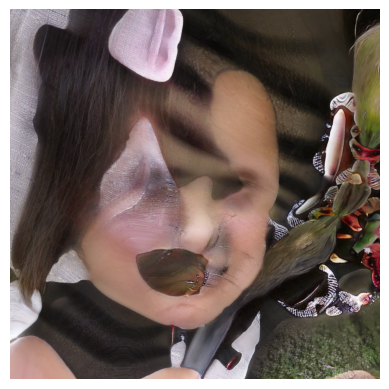

In [8]:
# Example 1 - Step 4: Display image

from PIL import Image
import matplotlib.pyplot as plt

# Define the image name
image_name = "seed6600.png"

# Define the image path and combine it with the image name
image_path = rf"/content/drive/My Drive/projects/stylegan3/{image_name}"
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()


If the code is correct, you should see the following image:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_4_image01D.png)

As you can see, the image generated by StyleGANS3 is bizarre. Don't worry, not all the images we will generate will look this strange.

### **Exercise 1 - Step 1: Run StyleGan From Command Line**

In the cell below, use the command line to have `StyleGAN3`generate 26 images by passing the argument ` --seeds=7600-7625`.

In [9]:
# Insert your code for Exercise 1 - Step 1 here

# Use StyleGAN3 model
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/"\
      "stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

# Pass seeds 7600-7625
!python /content/stylegan3/gen_images.py \
    --network={URL} \
  --outdir=/content/results --seeds=7600-7625

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
Generating image for seed 7600 (0/26) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 7601 (1/26) ...
Generating image for seed 7602 (2/26) ...
Generating image for seed 7603 (3/26) ...
Generating image for seed 7604 (4/26) ...
Gene

If your code is correct, you should see something similar to the following output. (Don't worry about any warnings)

~~~text
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
Generating image for seed 7600 (0/26) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation.
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation.
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 7601 (1/26) ...
Generating image for seed 7602 (2/26) ...
Generating image for seed 7603 (3/26) ...
Generating image for seed 7604 (4/26) ...
Generating image for seed 7605 (5/26) ...
Generating image for seed 7606 (6/26) ...
Generating image for seed 7607 (7/26) ...
Generating image for seed 7608 (8/26) ...
Generating image for seed 7609 (9/26) ...
Generating image for seed 7610 (10/26) ...
Generating image for seed 7611 (11/26) ...
Generating image for seed 7612 (12/26) ...
Generating image for seed 7613 (13/26) ...
Generating image for seed 7614 (14/26) ...
Generating image for seed 7615 (15/26) ...
Generating image for seed 7616 (16/26) ...
Generating image for seed 7617 (17/26) ...
Generating image for seed 7618 (18/26) ...
Generating image for seed 7619 (19/26) ...
Generating image for seed 7620 (20/26) ...
Generating image for seed 7621 (21/26) ...
Generating image for seed 7622 (22/26) ...
Generating image for seed 7623 (23/26) ...
Generating image for seed 7624 (24/26) ...
Generating image for seed 7625 (25/26) ...
~~~

### **Exercise 1 - Step 2: List Images**

Print out a list of the image files in your folder `/content/results`.


In [10]:
# Insert your code for Exercise 1 - Step 2 here

!ls /content/results

seed6600.png  seed6608.png  seed6616.png  seed6624.png	seed7606.png  seed7614.png  seed7622.png
seed6601.png  seed6609.png  seed6617.png  seed6625.png	seed7607.png  seed7615.png  seed7623.png
seed6602.png  seed6610.png  seed6618.png  seed7600.png	seed7608.png  seed7616.png  seed7624.png
seed6603.png  seed6611.png  seed6619.png  seed7601.png	seed7609.png  seed7617.png  seed7625.png
seed6604.png  seed6612.png  seed6620.png  seed7602.png	seed7610.png  seed7618.png
seed6605.png  seed6613.png  seed6621.png  seed7603.png	seed7611.png  seed7619.png
seed6606.png  seed6614.png  seed6622.png  seed7604.png	seed7612.png  seed7620.png
seed6607.png  seed6615.png  seed6623.png  seed7605.png	seed7613.png  seed7621.png


If your code is correct, you should see the following output:

~~~text
seed6600.png  seed6608.png  seed6616.png  seed6624.png	seed7606.png  seed7614.png  seed7622.png
seed6601.png  seed6609.png  seed6617.png  seed6625.png	seed7607.png  seed7615.png  seed7623.png
seed6602.png  seed6610.png  seed6618.png  seed7600.png	seed7608.png  seed7616.png  seed7624.png
seed6603.png  seed6611.png  seed6619.png  seed7601.png	seed7609.png  seed7617.png  seed7625.png
seed6604.png  seed6612.png  seed6620.png  seed7602.png	seed7610.png  seed7618.png
seed6605.png  seed6613.png  seed6621.png  seed7603.png	seed7611.png  seed7619.png
seed6606.png  seed6614.png  seed6622.png  seed7604.png	seed7612.png  seed7620.png
seed6607.png  seed6615.png  seed6623.png  seed7605.png	seed7613.png  seed7621.png
~~~

You should now see 52 image files, 26 from Example 1 and 26 new files form **Exercise 1**.

### **Exercise 1 - Step 3: Copy Images to GDrive**

Copy the new images to the folder `/content/drive/My\ Drive/projects/stylegan3` on your GDrive.


In [11]:
# Insert your code for Exercise 1 - Step 3 here

!cp /content/results/* "/content/drive/My Drive/projects/stylegan3/"

# List files to verify
!ls "/content/drive/My Drive/projects/stylegan3/"

seed6600.png  seed6608.png  seed6616.png  seed6624.png	seed7606.png  seed7614.png  seed7622.png
seed6601.png  seed6609.png  seed6617.png  seed6625.png	seed7607.png  seed7615.png  seed7623.png
seed6602.png  seed6610.png  seed6618.png  seed7600.png	seed7608.png  seed7616.png  seed7624.png
seed6603.png  seed6611.png  seed6619.png  seed7601.png	seed7609.png  seed7617.png  seed7625.png
seed6604.png  seed6612.png  seed6620.png  seed7602.png	seed7610.png  seed7618.png
seed6605.png  seed6613.png  seed6621.png  seed7603.png	seed7611.png  seed7619.png
seed6606.png  seed6614.png  seed6622.png  seed7604.png	seed7612.png  seed7620.png
seed6607.png  seed6615.png  seed6623.png  seed7605.png	seed7613.png  seed7621.png


If the code is correct, you should see the following output:

~~~text
seed6600.png  seed6608.png  seed6616.png  seed6624.png	seed7606.png  seed7614.png  seed7622.png
seed6601.png  seed6609.png  seed6617.png  seed6625.png	seed7607.png  seed7615.png  seed7623.png
seed6602.png  seed6610.png  seed6618.png  seed7600.png	seed7608.png  seed7616.png  seed7624.png
seed6603.png  seed6611.png  seed6619.png  seed7601.png	seed7609.png  seed7617.png  seed7625.png
seed6604.png  seed6612.png  seed6620.png  seed7602.png	seed7610.png  seed7618.png
seed6605.png  seed6613.png  seed6621.png  seed7603.png	seed7611.png  seed7619.png
seed6606.png  seed6614.png  seed6622.png  seed7604.png	seed7612.png  seed7620.png
seed6607.png  seed6615.png  seed6623.png  seed7605.png	seed7613.png  seed7621.png
~~~

### **Exercise 1 - Step 4: Display Image**

In the cell below write the code to display the first image you generated ("seed7600.png").



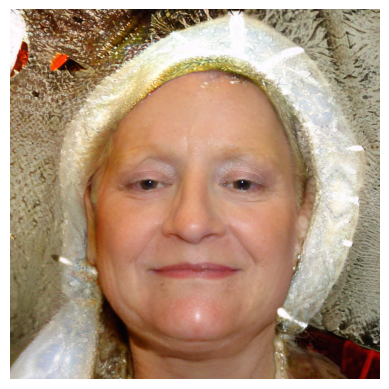

In [12]:
# Insert your code for Exercise 1 - Step 4 here


from PIL import Image
import matplotlib.pyplot as plt

# Define the image name
image_name = "seed7600.png"

# Define the image path and combine it with the image name
image_path = rf"/content/drive/My Drive/projects/stylegan3/{image_name}"
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

If the code is correct, you should see the following image:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_4_image02D.png)

Compared to the first image generated in the Example, this image is clearly that of a human face, albeit a rather strange one.

### Run StyleGAN From Python Code

This code in the cell below creates various utility functions to generate and display images using a StyleGAN3 model in a Python environment.

Here's a brief explanation of its components:

**1. Imports**
The imports load necessary libraries for model loading, tensor operations, image processing, and visualization:
- **`sys` and `os`**: Handle system paths and file operations.
- **`numpy`**: For numerical operations (e.g., generating latent vectors).
- **`PIL.Image`**: For working with images.
- **`torch`**: Used for PyTorch-based tensor operations.
- **`dnnlib` and `legacy`**: StyleGAN3-specific modules.
- **`matplotlib.pyplot`**: For displaying images.

**2. Function Definitions**
- **`seed2vec(G, seed)`**:  
  Converts a given random seed into a latent vector (used as input for the generator) based on the generator's latent space dimensions (`G.z_dim`).

- **`display_image(image)`**:  
  Displays a given image using Matplotlib. The axes are removed for a cleaner visualization.

- **`generate_image(G, z, truncation_psi)`**:  
  Uses the generator model (`G`) to render an image:
  - Applies truncation via the `truncation_psi` parameter to control image quality and variability.
  - Handles latent vector (`z`) and class label inputs to produce an image.

- **`get_label(G, device, class_idx)`**:  
  Generates a one-hot encoded label tensor for conditional models:
  - If the model is conditional (`G.c_dim > 0`), it assigns the label to the specified class index (`class_idx`).
  - If the model is unconditional, it ignores the label.

- **`generate_image(device, G, z, truncation_psi=1.0, noise_mode='const', class_idx=None)`**:  
  Extends image generation by handling:
  - Conversion of `z` (latent vector) to a PyTorch tensor.
  - Label assignment using `get_label`.
  - Generating an image by running the model and processing the output into a PIL image.

In [13]:
# Generate functions

import sys
sys.path.insert(0, "/content/stylegan3")
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy

def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(G, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8,
         nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])
    # [minibatch, height, width, channel]
    images = G.run(z, label, **G_kwargs)
    return images[0]

def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail("Must specify class label with --class when using "\
            "a conditional network")
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ("warn: --class=lbl ignored when running on "\
            "an unconditional network")
  return label

def generate_image(device, G, z, truncation_psi=1.0, noise_mode='const',
                   class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(\
      torch.uint8)
  return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

If the code is correct, you should not see any output.

### Example 2 - Step 1: Load Pre-Trained GAN Model

The code in the cell below loads a pretrained Generative Adversarial Network (GAN) model and prepare it for use on a CUDA-enabled GPU (e.g., NVIDIA GPUs).

#### **Code Explanation:**

**Define Model URL:**
```text
URL = "https://github.com/jeffheaton/pretrained-gan-fish/releases/"\
      "download/1.0.0/fish-gan-2020-12-09.pkl"
```
The variable URL points to the location of a pretrained GAN model file (here, a fish-themed GAN model stored on GitHub).


**Print Statement:**
```text
print(f'Loading networks from "{URL}"...')
```
Prints the URL being loaded to inform the user.


**Set Device for Computation:**
```text
device = torch.device('cuda')
```
Specifies the use of CUDA-enabled GPUs to accelerate computations. If CUDA isn't available, an error would occur.


**Open and Load Pretrained Model:((
```text
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)
```
`dnnlib.util.open_url(URL)`: Opens and reads the model file at the specified URL.

`legacy.load_network_pkl(f)`: Loads the GAN model from the file using StyleGAN's legacy format. The model components (e.g., generator, discriminator) are extracted.

`['G_ema']`: Refers to the "Exponential Moving Average" version of the generator, which is typically used for producing high-quality outputs.

`.to(device)`: Moves the generator model (G) to the GPU (device) for computation.

In [14]:
# Example 2 - Step 1:  Load pre-trained GAN model

URL = "https://github.com/jeffheaton/pretrained-gan-fish/releases/"\
  "download/1.0.0/fish-gan-2020-12-09.pkl"
#URL = "https://github.com/jeffheaton/pretrained-merry-gan-mas/releases/"\
#  "download/v1/christmas-gan-2020-12-03.pkl"
#URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
#  "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

# Print details
print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

Loading networks from "https://github.com/jeffheaton/pretrained-gan-fish/releases/download/1.0.0/fish-gan-2020-12-09.pkl"...


If the code is correct, you should see the following output:

~~~text
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
~~~

### Example 2 - Step 2: Generate and Display Images

The code in the cell below generates and displays images using a GAN model for a range of random seeds. Here's a step-by-step explanation:

**1. Seed Range Definition**
```text
SEED_FROM = 1000
SEED_TO = 1003
```
These variables specify the range of random seeds to be used for image generation.

* **SEED_FROM** is the starting seed (1000), and **SEED_TO** is the ending seed (1003, but it won't include 1003 as Python's range is exclusive of the end value).

**2. Loop Through Seeds**
```text
for i in range(SEED_FROM, SEED_TO):
    print(f"Seed {i}")
```
A for loop iterates through the seed range (1000, 1001, 1002).

For each seed, it prints the current seed number to keep track of which image is being generated.

**3. Convert Seed to Latent Vector**
```text
z = seed2vec(G, i)
```
Calls the `seed2vec` function, which converts the current seed (i) into a latent vector (z).

This vector represents the input to the GAN model's generator. It determines the characteristics of the generated image.

**4. Generate an Image**
```text
img = generate_image(device, G, z)
```
Calls the generate_image function, which uses the pretrained GAN generator model (G) and the latent vector (z) to generate an image.

The device variable ensures that the computation is performed on a GPU (if available).

**5. Display the Image**
```text
display_image(img)
```
Calls the display_image function, which uses Matplotlib to display the generated image. The axes are turned off for a clean view.

Seed 1000
Setting up PyTorch plugin "bias_act_plugin"... 

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.


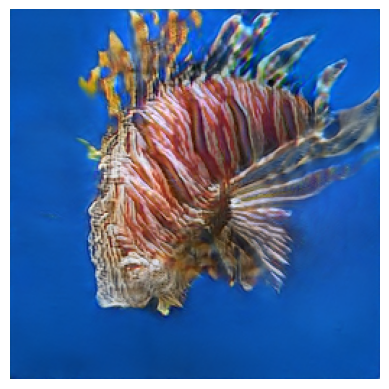

Seed 1001


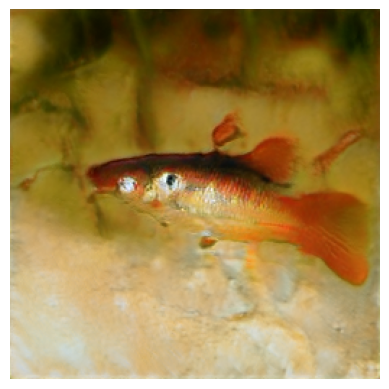

Seed 1002


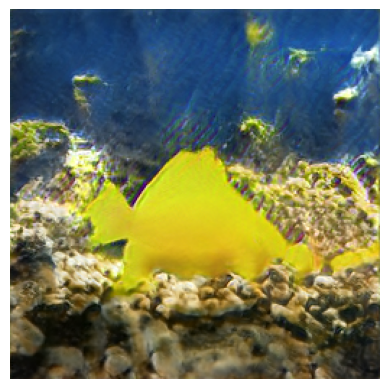

In [15]:
# Example 2 - Step 2: Generate and display images

# Choose your own starting and ending seed.
SEED_FROM = 1000
SEED_TO = 1003

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  z = seed2vec(G, i)
  img = generate_image(device, G, z)
  display_image(img)

If the code is correct, you should see the following image:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_4_image03D.png)

As you can see the `StyleGAN3` "pretrained-gan-fish` network has been trained to generate different fish images based on the `seed` values.

### **Exercise 2 - Step 1: Load Pre-Trained GAN Model**

In the cell below write the code to download the following `StyleGAN3` model

```text
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
  "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"
```

In [16]:
# Insert your code for Exercise 2 - Step 1 here


URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
  "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...


If the code is correct, you should see the following output:

~~~text
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
~~~

### **Exercise 2 - Step 2: Generate and Display Images**

In the cell below, write the Python code to generate images from integer seed codes starting at `1000` and ending at `1003`.


Seed 1000
Setting up PyTorch plugin "filtered_lrelu_plugin"... 

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.


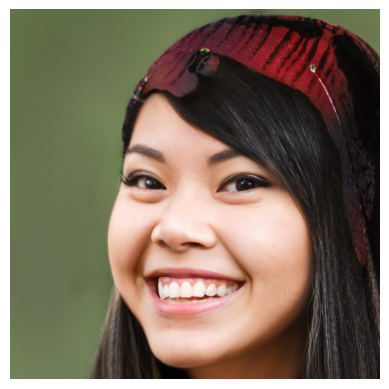

Seed 1001


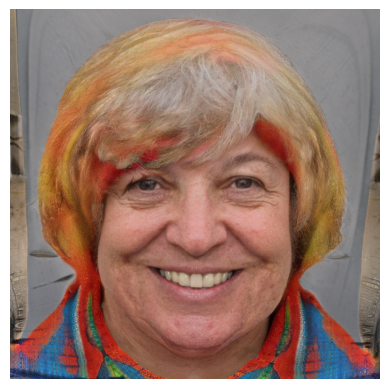

Seed 1002


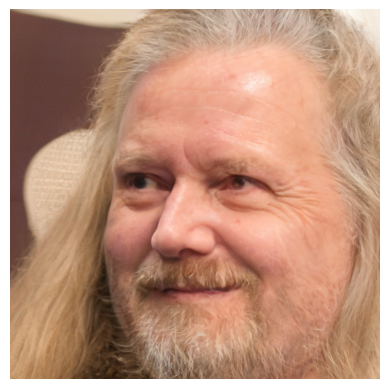

In [17]:
# Insert your code for Exercise 2 - Step 2 here


# Choose your own starting and ending seed.
SEED_FROM = 1000
SEED_TO = 1003

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  z = seed2vec(G, i)
  img = generate_image(device, G, z)
  display_image(img)

If the code is correct, you should see the following image:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_4_image04D.png)

## Examining the Latent Vector

Figure 7.LVEC shows the effects of transforming the latent vector between two images. We accomplish this transformation by slowly moving one 512-value latent vector to another 512 vector. A high-dimension point between two latent vectors will appear similar to both of the two endpoint latent vectors. Images that have similar latent vectors will appear similar to each other.

**Figure 7.LVEC: Transforming the Latent Vector**
![GAN](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan_progression.jpg "GAN")

In [18]:
def expand_seed(seeds, vector_size):
  result = []

  for seed in seeds:
    rnd = np.random.RandomState(seed)
    result.append( rnd.randn(1, vector_size) )
  return result

#URL = "https://github.com/jeffheaton/pretrained-gan-fish/releases/"\
#  "download/1.0.0/fish-gan-2020-12-09.pkl"
#URL = "https://github.com/jeffheaton/pretrained-merry-gan-mas/releases/"\
#  "download/v1/christmas-gan-2020-12-03.pkl"
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
  "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

vector_size = G.z_dim
# range(8192,8300)
seeds = expand_seed( [8192+1,8192+9], vector_size)
#generate_images(Gs, seeds,truncation_psi=0.5)
print(seeds[0].shape)

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
(1, 512)


If your code is correct, you should see the following output:

~~~text
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
(1, 512)
~~~

In [19]:
SEEDS = [6624,6618,6616] # Better for faces
#SEEDS = [1000,1003,1001] # Better for fish
STEPS = 100

# Remove any prior results
#!rm /content/results/*

from tqdm.notebook import tqdm

os.makedirs("./results/", exist_ok=True)

###
# Generate the images for the video.
idx = 0
for i in range(len(SEEDS)-1):
  v1 = seed2vec(G, SEEDS[i])
  v2 = seed2vec(G, SEEDS[i+1])

  diff = v2 - v1
  step = diff / STEPS
  current = v1.copy()

  for j in tqdm(range(STEPS), desc=f"Seed {SEEDS[i]}"):
     current = current + step
#     img = generate_image(device, G, current)
#     img.save(f'./results/frame-{idx}.png')
     idx+=1

Seed 6624:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 6618:   0%|          | 0/100 [00:00<?, ?it/s]

## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_03_3.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**

# **Ada**

![___](https://upload.wikimedia.org/wikipedia/commons/f/f9/Ada_Byron_daguerreotype_by_Antoine_Claudet_1843_or_1850_-_cropped_%28cropped%29.png)


**Ada Lovelace**

**Augusta Ada King, Countess of Lovelace** (née Byron; 10 December 1815-27 November 1852), also known as **Ada Lovelace**, was an English mathematician and writer chiefly known for her work on Charles Babbage's proposed mechanical general-purpose computer, the Analytical Engine. She was the first to recognise that the machine had applications beyond pure calculation.

Lovelace was the only legitimate child of poet Lord Byron and reformer Anne Isabella Milbanke. All her half-siblings, Lord Byron's other children, were born out of wedlock to other women. Lord Byron separated from his wife a month after Ada was born and left England forever. He died in Greece when she was eight. Lady Byron was anxious about her daughter's upbringing and promoted Lovelace's interest in mathematics and logic in an effort to prevent her from developing her father's perceived insanity. Despite this, Lovelace remained interested in her father, naming her two sons Byron and Gordon. Upon her death, she was buried next to her father at her request. Although often ill in her childhood, Lovelace pursued her studies assiduously. She married William King in 1835. King was made Earl of Lovelace in 1838, Ada thereby becoming Countess of Lovelace.

Lovelace's educational and social exploits brought her into contact with scientists such as Andrew Crosse, Charles Babbage, Sir David Brewster, Charles Wheatstone and Michael Faraday, and the author Charles Dickens, contacts which she used to further her education. Lovelace described her approach as "poetical science"[4] and herself as an "Analyst (& Metaphysician)".

When she was eighteen, Lovelace's mathematical talents led her to a long working relationship and friendship with fellow British mathematician Charles Babbage, who is known as "the father of computers". She was in particular interested in Babbage's work on the Analytical Engine. Lovelace first met him on 5 June 1833, when she and her mother attended one of Charles Babbage's Saturday night soirées[6] with their mutual friend, and Lovelace's private tutor, Mary Somerville.

Between 1842 and 1843, Lovelace translated an article by the military engineer Luigi Menabrea (later Prime Minister of Italy) about the Analytical Engine, supplementing it with an elaborate set of seven notes, simply called "Notes". Lovelace's notes are important in the early history of computers, especially since the seventh one contained what many consider to be the first computer program—that is, an algorithm designed to be carried out by a machine. Other historians reject this perspective and point out that Babbage's personal notes from 1837 to 1840 contain the first programs for the engine. She also developed a vision of the capability of computers to go beyond mere calculating or number-crunching, while many others, including Babbage himself, focused only on those capabilities. Her mindset of "poetical science" led her to ask questions about the Analytical Engine (as shown in her notes), examining how individuals and society relate to technology as a collaborative tool. The programming language **_Ada_** is named after her.

## **Biography**

**Childhood**

Lord Byron expected his child to be a "glorious boy" and was disappointed when Lady Byron gave birth to a girl. The child was named after Byron's half-sister, Augusta Leigh, and was called "Ada" by Byron himself. On 16 January 1816, at Lord Byron's command, Lady Byron left for her parents' home at Kirkby Mallory, taking their five-week-old daughter with her. Although English law at the time granted full custody of children to the father in cases of separation, Lord Byron made no attempt to claim his parental rights, but did request that his sister keep him informed of Ada's welfare.

On 21 April, Lord Byron signed the deed of separation, although very reluctantly, and left England for good a few days later. Aside from an acrimonious separation, Lady Byron continued throughout her life to make allegations about her husband's immoral behaviour. This set of events made Lovelace infamous in Victorian society. Ada did not have a relationship with her father. He died in 1824 when she was eight years old. Her mother was the only significant parental figure in her life. Lovelace was not shown the family portrait of her father until her 20th birthday.

Lovelace did not have a close relationship with her mother. She was often left in the care of her maternal grandmother Judith, Hon. Lady Milbanke, who doted on her. However, because of societal attitudes of the time—which favoured the husband in any separation, with the welfare of any child acting as mitigation—Lady Byron had to present herself as a loving mother to the rest of society. This included writing anxious letters to Lady Milbanke about her daughter's welfare, with a cover note saying to retain the letters in case she had to use them to show maternal concern. In one letter to Lady Milbanke, she referred to her daughter as "it": "I talk to it for your satisfaction, not my own, and shall be very glad when you have it under your own." Lady Byron had her teenage daughter watched by close friends for any sign of moral deviation. Lovelace dubbed these observers the "Furies" and later complained they exaggerated and invented stories about her.

Lovelace was often ill, beginning in early childhood. At the age of eight, she experienced headaches that obscured her vision. In June 1829, she was paralyzed after a bout of measles. She was subjected to continuous bed rest for nearly a year, something which may have extended her period of disability. By 1831, she was able to walk with crutches. Despite the illnesses, she developed her mathematical and technological skills.

When Ada was twelve years old, this future "Lady Fairy", as Charles Babbage affectionately called her, decided she wanted to fly. Ada Byron went about the project methodically, thoughtfully, with imagination and passion. Her first step, in February 1828, was to construct wings. She investigated different material and sizes. She considered various materials for the wings: paper, oilsilk, wires, and feathers. She examined the anatomy of birds to determine the right proportion between the wings and the body. She decided to write a book, Flyology, illustrating, with plates, some of her findings. She decided what equipment she would need; for example, a compass, to "cut across the country by the most direct road", so that she could surmount mountains, rivers, and valleys. Her final step was to integrate steam with the "art of flying".

Ada Byron had an affair with a tutor in early 1833. She tried to elope with him after she was caught, but the tutor's relatives recognised her and contacted her mother. Lady Byron and her friends covered the incident up to prevent a public scandal. Lovelace never met her younger half-sister, Allegra, the daughter of Lord Byron and Claire Clairmont. Allegra died in 1822 at the age of five. Lovelace did have some contact with Elizabeth Medora Leigh, the daughter of Byron's half-sister Augusta Leigh, who purposely avoided Lovelace as much as possible when introduced at court.

**Adult years**

Lovelace became close friends with her tutor Mary Somerville, who introduced her to Charles Babbage in 1833. She had a strong respect and affection for Somerville,[24] and they corresponded for many years. Other acquaintances included the scientists Andrew Crosse, Sir David Brewster, Charles Wheatstone, Michael Faraday and the author Charles Dickens. She was presented at Court at the age of seventeen "and became a popular belle of the season" in part because of her "brilliant mind". By 1834 Ada was a regular at Court and started attending various events. She danced often and was able to charm many people, and was described by most people as being dainty, although John Hobhouse, Byron's friend, described her as "a large, coarse-skinned young woman but with something of my friend's features, particularly the mouth". This description followed their meeting on 24 February 1834 in which Ada made it clear to Hobhouse that she did not like him, probably due to her mother's influence, which led her to dislike all of her father's friends. This first impression was not to last, and they later became friends.

On 8 July 1835, she married William, 8th Baron King, becoming Lady King. They had three homes: Ockham Park, Surrey; a Scottish estate on Loch Torridon in Ross-shire; and a house in London. They spent their honeymoon at Ashley Combe near Porlock Weir, Somerset, which had been built as a hunting lodge in 1799 and was improved by King in preparation for their honeymoon. It later became their summer retreat and was further improved during this time. From 1845, the family's main house was Horsley Towers, built in the Tudorbethan fashion by the architect of the Houses of Parliament, Charles Barry, and later greatly enlarged to Lovelace's own designs.

They had three children: Byron (born 1836); Anne Isabella (called Annabella, born 1837); and Ralph Gordon (born 1839). Immediately after the birth of Annabella, Lady King experienced "a tedious and suffering illness, which took months to cure".[27] Ada was a descendant of the extinct Barons Lovelace and in 1838, her husband was made Earl of Lovelace and Viscount Ockham, meaning Ada became the Countess of Lovelace. In 1843–44, Ada's mother assigned William Benjamin Carpenter to teach Ada's children and to act as a "moral" instructor for Ada. He quickly fell for her and encouraged her to express any frustrated affections, claiming that his marriage meant he would never act in an "unbecoming" manner. When it became clear that Carpenter was trying to start an affair, Ada cut it off.

In 1841, Lovelace and Medora Leigh (the daughter of Lord Byron's half-sister Augusta Leigh) were told by Ada's mother that Ada's father was also Medora's father.[33] On 27 February 1841, Ada wrote to her mother: "I am not in the least astonished. In fact, you merely confirm what I have for years and years felt scarcely a doubt about, but should have considered it most improper in me to hint to you that I in any way suspected." She did not blame the incestuous relationship on Byron, but instead blamed Augusta Leigh: "I fear she is more inherently wicked than he ever was." In the 1840s, Ada flirted with scandals: firstly, from a relaxed approach to extra-marital relationships with men, leading to rumours of affairs; and secondly, from her love of gambling. She apparently lost more than £3,000 on the horses during the later 1840s. The gambling led to her forming a syndicate with male friends, and an ambitious attempt in 1851 to create a mathematical model for successful large bets. This went disastrously wrong, leaving her thousands of pounds in debt to the syndicate, forcing her to admit it all to her husband.[38] She had a shadowy relationship with Andrew Crosse's son John from 1844 onwards. John Crosse destroyed most of their correspondence after her death as part of a legal agreement. She bequeathed him the only heirlooms her father had personally left to her. During her final illness, she would panic at the idea of the younger Crosse being kept from visiting her.